In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray

In [2]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [
            CB91_Blue,
            CB91_Amber,
            CB91_Green,
            CB91_Violet,
            CB91_Pink,
            CB91_Purple,
            ]
              
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [3]:
# import seaborn as sns

# sns.set(font='Franklin Gothic Book',
#         rc={
#                 'axes.axisbelow': False,
#                 'axes.edgecolor': 'lightgrey',
#                 'axes.facecolor': 'None',
#                 'axes.grid': False,
#                 'axes.labelcolor': 'dimgrey',
#                 'axes.spines.right': False,
#                 'axes.spines.top': False,
#                 'figure.facecolor': 'white',
#                 'lines.solid_capstyle': 'round',
#                 'patch.edgecolor': 'w',
#                 'patch.force_edgecolor': True,
#                 'text.color': 'dimgrey',
#                 'xtick.bottom': False,
#                 'xtick.color': 'dimgrey',
#                 'xtick.direction': 'out',
#                 'xtick.top': False,
#                 'ytick.color': 'dimgrey',
#                 'ytick.direction': 'out',
#                 'ytick.left': False,
#                 'ytick.right': False,
#                 'text.usetex' : True,
#                 'font.family' : 'serif',
#             }
#         )
# # sns.set_context("notebook", rc={'text.usetex' : True, 'font.family' : 'serif'})

In [4]:
IRRADIANCE_1 = 900
IRRADIANCE_2 = 600
IRRADIANCE_3 = 300
TEMPERATURE_1 = 16.88
TEMPERATURE_2 = 16.25
TEMPERATURE_3 = 15.625
CELL_TEMP_1 = ShadedArray.cell_temp_from_ambient(IRRADIANCE_1, TEMPERATURE_1)
CELL_TEMP_2 = ShadedArray.cell_temp_from_ambient(IRRADIANCE_2, TEMPERATURE_2)
CELL_TEMP_3 = ShadedArray.cell_temp_from_ambient(IRRADIANCE_3, TEMPERATURE_3)

pvsyss = ShadedArray.get_default_array()

plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [5]:
pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_1, ] * 4,
    ambient_temperature=[TEMPERATURE_1, ] * 4,
)
uniform_curve_1 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_1 = pvsyss.power(uniform_curve_1.voltage, uniform_curve_1.current)
mpp_1 = pvsyss.mpp_from_curve(uniform_curve_1)

pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_2, ] * 4,
    ambient_temperature=[TEMPERATURE_2, ] * 4,
)
uniform_curve_2 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_2 = pvsyss.power(uniform_curve_2.voltage, uniform_curve_2.current)
mpp_2 = pvsyss.mpp_from_curve(uniform_curve_2)

pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[IRRADIANCE_3, ] * 4,
    ambient_temperature=[TEMPERATURE_3, ] * 4,
)
uniform_curve_3 = pvsyss.get_shaded_iv_curve(curve_points=1000)
power_3 = pvsyss.power(uniform_curve_3.voltage, uniform_curve_3.current)
mpp_3 = pvsyss.mpp_from_curve(uniform_curve_3)


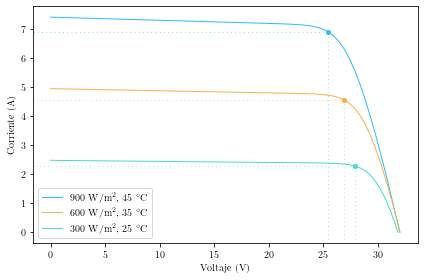

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")

# Plot I-V curves
# dashes = (line size, space size)
ax.plot(uniform_curve_1.voltage, uniform_curve_1.current, linewidth=1.0, label=f'{IRRADIANCE_1} $\mathrm{{W/m^2}}$, {CELL_TEMP_1:0.0f} $^\circ \mathrm{{C}}$')
ax.plot(uniform_curve_2.voltage, uniform_curve_2.current, linewidth=1.0, label=f'{IRRADIANCE_2} $\mathrm{{W/m^2}}$, {CELL_TEMP_2:0.0f} $^\circ \mathrm{{C}}$')
ax.plot(uniform_curve_3.voltage, uniform_curve_3.current, linewidth=1.0, label=f'{IRRADIANCE_3} $\mathrm{{W/m^2}}$, {CELL_TEMP_3:0.0f} $^\circ \mathrm{{C}}$')

ax.set_prop_cycle(None) # Reset color cycle

# Plot MPP
ax.plot(mpp_1.voltage, mpp_1.current, 'o', markersize=4)
ax.plot(mpp_2.voltage, mpp_2.current, 'o', markersize=4)
ax.plot(mpp_3.voltage, mpp_3.current, 'o', markersize=4)

ax.set_prop_cycle(None)

# Save current limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot lines from MPP to x-axis
ax.plot([mpp_1.voltage, ] * 2, [-100, mpp_1.current], linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_2.voltage, ] * 2, [-100, mpp_2.current], linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_3.voltage, ] * 2, [-100, mpp_3.current], linestyle='--', dashes=(1, 5), linewidth=0.7)

ax.set_prop_cycle(None)

# Plot lines from MPP to y-axis
ax.plot([mpp_1.voltage, max(uniform_curve_1.voltage) * -2], [mpp_1.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_2.voltage, max(uniform_curve_2.voltage) * -2], [mpp_2.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)
ax.plot([mpp_3.voltage, max(uniform_curve_3.voltage) * -2], [mpp_3.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)

# Restore limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.legend(loc='lower left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_08_iv_curve_three_sets.pdf', bbox_inches='tight')